# Capstone Project - Automatic Ticketing Statement

### Problem Statement
* **DOMAIN :**  Automatic Ticketing System
* **CONTEXT :**  One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organisations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service. 
* **Business Domain Value:** In the support process, incoming incidents are analysed and assessed by organisations support teams to fulfill the request. In many organisations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket
categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.
* **PROJECT DESCRIPTION:** In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.
1.   **Pre-Processing, Data Visualisation and EDA**
* Exploring the given Data files 
* Understanding the structure of data 
* Missing points in data 
* Finding inconsistencies in the data 
* Visualising different patterns 
* Visualising different text features 
* Dealing with missing values 
* Text preprocessing 
* Creating word vocabulary from the corpus of report text data
* Creating tokens as required 
2. **Model Building**
* Building a model architecture which can classify.
* Trying different model architectures by researching state of the art for similar tasks.
* Train the model.
* To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch. 
3. **Test the Model, Fine-tuning and Repeat**
*  Test the model and report as per evaluation metrics 
* Try different models 
* Try different evaluation metrics 
* Set different hyper parameters, by trying different optimisers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. For these models to fine-tune them 
* Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric. 
* **PROJECT OBJECTIVE:**
* Learn how to use different classification models. 
* Use transfer learning to use pre-built models. 
* Learn to set the optimisers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc 
* Read different research papers of given domain to obtain the knowledge of advanced models for the given problem. 

### Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the Libraries

In [ ]:
# Utilities
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import warnings, pickle, string
!pip install ftfy
from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Translation APIs
!pip install goslate
from goslate import Goslate # Provided by Google

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

# Configure for any default setting of any library
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

     |████████████████████████████████| 53 kB 1.6 MB/s 
  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=6686c7d37ecb7d4e0821f1850221cb808d5f864ea822eeb878a9d5781716ff75
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


### Maintaining the Project and Dataset Path

In [ ]:
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/Colab Notebooks/"

    from google.colab import drive

    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

print('Current working directory', os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks
Current working directory /content/drive/My Drive/Colab Notebooks


## PART 1 - Pre-Processing, Data Visualization and EDA

* Exploring the given Data files
* Understanding the structure of data
* Missing points in data
* Finding inconsistencies in the data
* Visualizing different patterns
* Visualizing different text features
* Dealing with missing values
* Text preprocessing
* Creating word vocabulary from the corpus of report text data
* Creating tokens as required

### Displaying first 5 records of Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset.xlsx', )
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

### Displaying last 5 records of Dataset

In [ ]:
df.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

### Printing information about the data

In [ ]:
print('No of rows:\033[1m', df.shape[0], '\033[0m')
print('No of cols:\033[1m', df.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


### Printing description of the dataset with various summary and statistics

In [ ]:
df.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [ ]:
df[df.Description == 'the'].head()

Short description Description  \
1049  reset passwords for soldfnbq uhnbsvqd using pa...         the   
1054  reset passwords for fygrwuna gomcekzi using pa...         the   
1144  reset passwords for wvdxnkhf jirecvta using pa...         the   
1184  reset passwords for pxvjczdt kizsjfpq using pa...         the   
1292  reset passwords for cubdsrml znewqgop using pa...         the   

                 Caller Assignment group  
1049  soldfnbq uhnbsvqd           GRP_17  
1054  fygrwuna gomcekzi           GRP_17  
1144  wvdxnkhf jirecvta           GRP_17  
1184  pxvjczdt kizsjfpq           GRP_17  
1292  cubdsrml znewqgop           GRP_17

### Finding out the NULL values in each column

In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
df[pd.isnull(df).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

### Printing the summary of dataset after NULL treatment

In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

* We have replaced the NULL values in the dataset by an empty string.

### Finding the duplicates dataset

In [ ]:
df_copy=df.astype(str)
duplicateRows_df=df_copy[df_copy.duplicated()]
print(duplicateRows_df)
print(duplicateRows_df.sum())

                                      Short description  \
51                           call for ecwtrjnq jpecxuty   
229                          call for ecwtrjnq jpecxuty   
493                     ticket update on inplant_872730   
512                                    blank call //gso   
667   job bkbackup_tool_powder_prod_full failed in j...   
...                                                 ...   
7836             probleme mit erpgui \tmqfjard qzhgdoua   
8051               issue on pricing in distributor_tool   
8093  reset passwords for prgthyuulla ramdntythanjes...   
8347                           blank call // loud noise   
8405                           unable to launch outlook   

                                            Description             Caller  \
51                           call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
229                          call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
493                     ticket update on inplant_872730  

### Removing Duplicates in the dataset

In [ ]:
def rm_duplicate(text):
  text.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'],inplace=True)
  return text

rm_duplicate(df_copy)

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
0               GRP_0  
1               GRP_0  
2               GRP_0  
3               GRP_0  
4               GRP_0  
...               ...  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49  

[8417 rows x 4 columns]

We can address NULL/Missing values in the dataset in a variety of ways, including:
- Replacing them with an empty string
- Replacing them with some default values
- Duplicating the Short description and Description values in cases where one of them is null.
- Completely removing records with null/missing values.
- We're not dropping any records since we don't want to lose any data. We don't want to pollute the data by introducing default values or bias it by duplicating the description columns because we're going to concatenate the Short description and Description columns for each record before feeding them into NLP.
- As a result, our NULL/Missing value handling simply replaces NaN cells with empty strings.

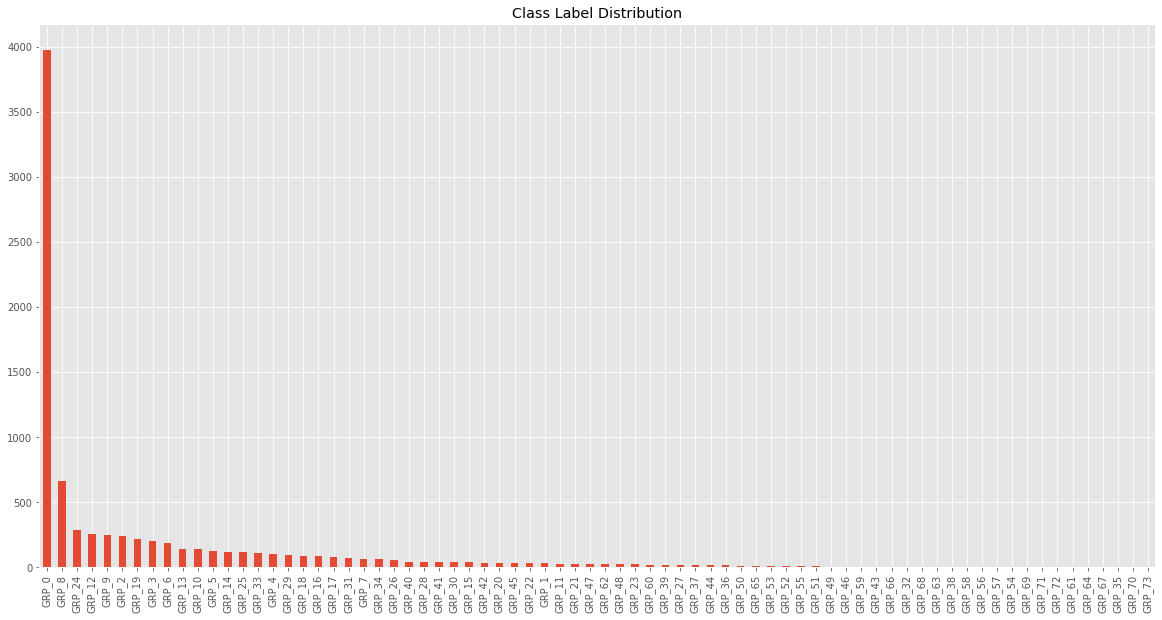

In [ ]:
df['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

**Mojibake**

Mojibake is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system.

This display may include the generic replacement character ("�") in places where the binary representation is considered invalid. A replacement can also involve multiple consecutive symbols, as viewed in one encoding, when the same binary code constitutes one symbol in the other encoding. This is either because of differing constant length encoding (as in Asian 16-bit encodings vs European 8-bit encodings), or the use of variable length encodings (notably UTF-8 and UTF-16). Few such Mojibakes are ¶, ç, å, €, æ, œ, º, ‡, ¼, ¥ etc.

As we're dealing with Natural Language and the source of the data is unknown to us, let's run the encoding check to figure out if the dataset is Mojibake impacted.

The library ftfy (Fixes Text For You) has a greater ability to detect, fix and deal with such Mojibakes. It fixes Unicode that’s broken in various ways. The goal of ftfy is to take in bad Unicode and output good Unicode.

In [ ]:
MOJIBAKE_CATEGORIES = {
    # Characters that appear in many different contexts. Sequences that contain
    # them are not inherently mojibake
    "common": (
        "\N{NO-BREAK SPACE}"
        "\N{SOFT HYPHEN}"
        "\N{MIDDLE DOT}"
        "\N{ACUTE ACCENT}"
        "\N{EN DASH}"
        "\N{EM DASH}"
        "\N{HORIZONTAL BAR}"
        "\N{HORIZONTAL ELLIPSIS}"
        "\N{RIGHT SINGLE QUOTATION MARK}"
    ),
    # the C1 control character range, which have no uses outside of mojibake anymore
    "c1": "\x80-\x9f",
    # Characters that are nearly 100% used in mojibake
    "bad": (
        "\N{BROKEN BAR}"
        "\N{CURRENCY SIGN}"
        "\N{DIAERESIS}"
        "\N{NOT SIGN}"
        "\N{MACRON}"
        "\N{PILCROW SIGN}"
        "\N{SECTION SIGN}"
        "\N{CEDILLA}"
        "\N{LATIN SMALL LETTER F WITH HOOK}"
        "\N{MODIFIER LETTER CIRCUMFLEX ACCENT}"  # it's not a modifier
        "\N{CARON}"
        "\N{BREVE}"
        "\N{OGONEK}"
        "\N{SMALL TILDE}"
        "\N{DAGGER}"
        "\N{DOUBLE DAGGER}"
        "\N{PER MILLE SIGN}"
        "\N{REVERSED NOT SIGN}"
        "\N{LOZENGE}"
        "\ufffd"
        # Theoretically these would appear in 'numeric' contexts, but when they
        # co-occur with other mojibake characters, it's not really ambiguous
        "\N{FEMININE ORDINAL INDICATOR}"
        "\N{MASCULINE ORDINAL INDICATOR}"
    ),
    "currency": (
        "\N{CENT SIGN}"
        "\N{POUND SIGN}"
        "\N{YEN SIGN}"
        "\N{PESETA SIGN}"
        "\N{EURO SIGN}"
    ),
    "start_punctuation": (
        "\N{INVERTED EXCLAMATION MARK}"
        "\N{LEFT-POINTING DOUBLE ANGLE QUOTATION MARK}"
        "\N{INVERTED QUESTION MARK}"
        "\N{COPYRIGHT SIGN}"
        "\N{GREEK TONOS}"
        "\N{GREEK DIALYTIKA TONOS}"
        "\N{LEFT SINGLE QUOTATION MARK}"
        "\N{SINGLE LOW-9 QUOTATION MARK}"
        "\N{LEFT DOUBLE QUOTATION MARK}"
        "\N{DOUBLE LOW-9 QUOTATION MARK}"
        "\N{BULLET}"
        "\N{SINGLE LEFT-POINTING ANGLE QUOTATION MARK}"
        "\uf8ff"  # OS-specific symbol, usually the Apple logo
    ),
    "end_punctuation": (
        "\N{REGISTERED SIGN}"
        "\N{RIGHT-POINTING DOUBLE ANGLE QUOTATION MARK}"
        "\N{DOUBLE ACUTE ACCENT}"
        "\N{RIGHT DOUBLE QUOTATION MARK}"
        "\N{SINGLE RIGHT-POINTING ANGLE QUOTATION MARK}"
        "\N{TRADE MARK SIGN}"
    ),
    "numeric": (
        "\N{SUPERSCRIPT TWO}"
        "\N{SUPERSCRIPT THREE}"
        "\N{SUPERSCRIPT ONE}"
        "\N{PLUS-MINUS SIGN}"
        "\N{VULGAR FRACTION ONE QUARTER}"
        "\N{VULGAR FRACTION ONE HALF}"
        "\N{VULGAR FRACTION THREE QUARTERS}"
        "\N{MULTIPLICATION SIGN}"
        "\N{MICRO SIGN}"
        "\N{DIVISION SIGN}"
        "\N{FRACTION SLASH}"
        "\N{PARTIAL DIFFERENTIAL}"
        "\N{INCREMENT}"
        "\N{N-ARY PRODUCT}"
        "\N{N-ARY SUMMATION}"
        "\N{SQUARE ROOT}"
        "\N{INFINITY}"
        "\N{INTERSECTION}"
        "\N{INTEGRAL}"
        "\N{ALMOST EQUAL TO}"
        "\N{NOT EQUAL TO}"
        "\N{IDENTICAL TO}"
        "\N{LESS-THAN OR EQUAL TO}"
        "\N{GREATER-THAN OR EQUAL TO}"
        "\N{NUMERO SIGN}"
    ),
    # Letters that might be used to make emoticon faces (kaomoji), and
    # therefore might need to appear in more improbable-looking contexts.
    #
    # These are concatenated character ranges for use in a regex. I know
    # they look like faces themselves. I think expressing the ranges like
    # this helps to illustrate why we need to be careful with these
    # characters.
    "kaomoji": (
        "Ò-Ö"
        "Ù-Ü"
        "ò-ö"
        "ø-ü"
        "\N{LATIN CAPITAL LETTER O WITH DOUBLE ACUTE}"
        "\N{DEGREE SIGN}"
    ),
    "upper_accented": (
        # LATIN CAPITAL LETTER A WITH GRAVE - LATIN CAPITAL LETTER N WITH TILDE
        "\xc0-\xd1"
        # skip capital O's and U's that could be used in kaomoji, but
        # include Ø because it's very common in Arabic mojibake:
        "\N{LATIN CAPITAL LETTER O WITH STROKE}"
        "\N{LATIN CAPITAL LETTER U WITH DIAERESIS}"
        "\N{LATIN CAPITAL LETTER Y WITH ACUTE}"
        "\N{LATIN CAPITAL LETTER A WITH BREVE}"
        "\N{LATIN CAPITAL LETTER A WITH OGONEK}"
        "\N{LATIN CAPITAL LETTER C WITH ACUTE}"
        "\N{LATIN CAPITAL LETTER C WITH CARON}"
        "\N{LATIN CAPITAL LETTER D WITH CARON}"
        "\N{LATIN CAPITAL LETTER D WITH STROKE}"
        "\N{LATIN CAPITAL LETTER E WITH OGONEK}"
        "\N{LATIN CAPITAL LETTER E WITH CARON}"
        "\N{LATIN CAPITAL LETTER G WITH BREVE}"
        "\N{LATIN CAPITAL LETTER I WITH DOT ABOVE}"
        "\N{LATIN CAPITAL LETTER L WITH ACUTE}"
        "\N{LATIN CAPITAL LETTER L WITH CARON}"
        "\N{LATIN CAPITAL LETTER L WITH STROKE}"
        "\N{LATIN CAPITAL LETTER N WITH ACUTE}"
        "\N{LATIN CAPITAL LETTER N WITH CARON}"
        "\N{LATIN CAPITAL LIGATURE OE}"
        "\N{LATIN CAPITAL LETTER R WITH CARON}"
        "\N{LATIN CAPITAL LETTER S WITH ACUTE}"
        "\N{LATIN CAPITAL LETTER S WITH CEDILLA}"
        "\N{LATIN CAPITAL LETTER S WITH CARON}"
        "\N{LATIN CAPITAL LETTER T WITH CEDILLA}"
        "\N{LATIN CAPITAL LETTER T WITH CARON}"
        "\N{LATIN CAPITAL LETTER U WITH RING ABOVE}"
        "\N{LATIN CAPITAL LETTER U WITH DOUBLE ACUTE}"
        "\N{LATIN CAPITAL LETTER Y WITH DIAERESIS}"
        "\N{LATIN CAPITAL LETTER Z WITH ACUTE}"
        "\N{LATIN CAPITAL LETTER Z WITH DOT ABOVE}"
        "\N{LATIN CAPITAL LETTER Z WITH CARON}"
        "\N{CYRILLIC CAPITAL LETTER GHE WITH UPTURN}"
    ),
    "lower_accented": (
        "\N{LATIN SMALL LETTER SHARP S}"
        # LATIN SMALL LETTER A WITH GRAVE - LATIN SMALL LETTER N WITH TILDE
        "\xe0-\xf1"
        # skip o's and u's that could be used in kaomoji
        "\N{LATIN SMALL LETTER A WITH BREVE}"
        "\N{LATIN SMALL LETTER A WITH OGONEK}"
        "\N{LATIN SMALL LETTER C WITH ACUTE}"
        "\N{LATIN SMALL LETTER C WITH CARON}"
        "\N{LATIN SMALL LETTER D WITH CARON}"
        "\N{LATIN SMALL LETTER D WITH STROKE}"
        "\N{LATIN SMALL LETTER E WITH OGONEK}"
        "\N{LATIN SMALL LETTER E WITH CARON}"
        "\N{LATIN SMALL LETTER G WITH BREVE}"
        "\N{LATIN SMALL LETTER L WITH ACUTE}"
        "\N{LATIN SMALL LETTER L WITH CARON}"
        "\N{LATIN SMALL LETTER L WITH STROKE}"
        "\N{LATIN SMALL LIGATURE OE}"
        "\N{LATIN SMALL LETTER R WITH ACUTE}"
        "\N{LATIN SMALL LETTER S WITH ACUTE}"
        "\N{LATIN SMALL LETTER S WITH CEDILLA}"
        "\N{LATIN SMALL LETTER S WITH CARON}"
        "\N{LATIN SMALL LETTER T WITH CARON}"
        "\N{LATIN SMALL LETTER U WITH DIAERESIS}"
        "\N{LATIN SMALL LETTER Z WITH ACUTE}"
        "\N{LATIN SMALL LETTER Z WITH DOT ABOVE}"
        "\N{LATIN SMALL LETTER Z WITH CARON}"
        "\N{CYRILLIC SMALL LETTER GHE WITH UPTURN}"
        "\N{LATIN SMALL LIGATURE FI}"
        "\N{LATIN SMALL LIGATURE FL}"
    ),
    "upper_common": (
        "\N{LATIN CAPITAL LETTER THORN}"
        "\N{GREEK CAPITAL LETTER ALPHA}-\N{GREEK CAPITAL LETTER OMEGA}"
        # not included under 'accented' because these can commonly
        # occur at ends of words, in positions where they'd be detected
        # as mojibake
        "\N{GREEK CAPITAL LETTER ALPHA WITH TONOS}"
        "\N{GREEK CAPITAL LETTER EPSILON WITH TONOS}"
        "\N{GREEK CAPITAL LETTER ETA WITH TONOS}"
        "\N{GREEK CAPITAL LETTER IOTA WITH TONOS}"
        "\N{GREEK CAPITAL LETTER OMICRON WITH TONOS}"
        "\N{GREEK CAPITAL LETTER UPSILON WITH TONOS}"
        "\N{GREEK CAPITAL LETTER OMEGA WITH TONOS}"
        "\N{GREEK CAPITAL LETTER IOTA WITH DIALYTIKA}"
        "\N{GREEK CAPITAL LETTER UPSILON WITH DIALYTIKA}"
        "\N{CYRILLIC CAPITAL LETTER IO}-\N{CYRILLIC CAPITAL LETTER YA}"
    ),
    "lower_common": (
        # lowercase thorn does not appear in mojibake
        "\N{GREEK SMALL LETTER ALPHA}-\N{GREEK SMALL LETTER OMEGA}"
        "\N{GREEK SMALL LETTER ALPHA WITH TONOS}"
        "\N{GREEK SMALL LETTER EPSILON WITH TONOS}"
        "\N{GREEK SMALL LETTER ETA WITH TONOS}"
        "\N{GREEK SMALL LETTER IOTA WITH TONOS}"
        "\N{GREEK SMALL LETTER UPSILON WITH DIALYTIKA AND TONOS}"
        "\N{CYRILLIC SMALL LETTER A}-\N{CYRILLIC SMALL LETTER DZHE}"
    ),
    "box": (
        # omit the single horizontal line, might be used in kaomoji
        "│┌┐┘├┤┬┼"
        "\N{BOX DRAWINGS DOUBLE HORIZONTAL}-\N{BOX DRAWINGS DOUBLE VERTICAL AND HORIZONTAL}"
        "▀▄█▌▐░▒▓"
    ),
}


In [ ]:
import warnings
import re
def sequence_weirdness(text):
    """
    This was the name of the heuristic used in ftfy 2.x through 5.x. As an
    attempt at compatibility with external code that calls the heuristic
    directly, we redirect to our new heuristic, :func:`badness`.
    """
    warnings.warn(
        "`sequence_weirdness()` is an old heuristic, and the current "
        "closest equivalent is `ftfy.badness.badness()`"
    )
    return badness(text)

In [ ]:
BADNESS_RE = re.compile(
    r"""
    [{c1}]
    |
    [{bad}{lower_accented}{upper_accented}{box}{start_punctuation}{end_punctuation}{currency}{numeric}] [{bad}]
    |
    [a-zA-Z] [{lower_common}{upper_common}] [{bad}]
    |
    [{bad}] [{lower_accented}{upper_accented}{box}{start_punctuation}{end_punctuation}{currency}{numeric}]
    |
    [{lower_accented}{lower_common}{box}{end_punctuation}{currency}{numeric}] [{upper_accented}]
    |
    [{box}{end_punctuation}{currency}{numeric}] [{lower_accented}]
    |
    # leave out [upper_accented][currency] without further info, because it's used in some
    # fancy leetspeak-esque writing
    [{lower_accented}{box}{end_punctuation}] [{currency}]
    |
    \s [{upper_accented}] [{currency}]
    |
    [{upper_accented}{box}] [{numeric}]
    |
    [{lower_accented}{upper_accented}{box}{currency}{end_punctuation}] [{start_punctuation}] [{numeric}]
    |
    [{lower_accented}{upper_accented}{currency}{numeric}{box}] [{end_punctuation}] [{start_punctuation}]
    |
    [{currency}{numeric}{box}] [{start_punctuation}]
    |
    [a-z] [{upper_accented}] [{start_punctuation}{currency}]
    |
    [{box}] [{kaomoji}]
    |
    [{lower_accented}{upper_accented}{currency}{numeric}{start_punctuation}{end_punctuation}] [{box}]
    |
    [{box}] [{end_punctuation}]
    |
    [{lower_accented}{upper_accented}] [{end_punctuation}] \w
    |
    # The ligature œ when not followed by an unaccented Latin letter
    [Œœ][^A-Za-z]
    |
    # Common Windows-1252 2-character mojibake that isn't covered by the cases above
    [ÂÃÎÐ][€Šš¢£Ÿž\xa0\xad®©°·»{start_punctuation}{end_punctuation}–—´]
    |
    × [²³]
    |
    # Windows-1252 mojibake of Arabic words needs to include the 'common' characters.
    # To compensate, we require four characters to be matched.
      [ØÙ] [{common}{currency}{bad}{numeric}{start_punctuation}ŸŠ®°µ»]
      [ØÙ] [{common}{currency}{bad}{numeric}{start_punctuation}ŸŠ®°µ»]
    |
    # Windows-1252 mojibake that starts 3-character sequences for some South Asian
    # alphabets
    à[²µ¹¼½¾]
    |
    # MacRoman mojibake that isn't covered by the cases above
    √[±∂†≠®™´≤≥¥µø]
    |
    ≈[°¢]
    |
    ‚Ä[ìîïòôúùû†°¢π]
    |
    ‚[âó][àä°ê]
    |
    # Windows-1251 mojibake of characters in the U+2000 range
    вЂ
    |
    # Windows-1251 mojibake of Latin-1 characters and/or the Cyrillic alphabet.
    # Because the 2-character sequences involved here may be common, we require
    # seeing a 3-character sequence.
    [ВГРС][{c1}{bad}{start_punctuation}{end_punctuation}{currency}°µ][ВГРС]
    |
    # A distinctive five-character sequence of Cyrillic letters, which can be
    # Windows-1251 mojibake on top of Latin-1 mojibake of Windows-1252 characters.
    # Require a Latin letter nearby.
    ГўВЂВ.[A-Za-z ]
    |
    # Windows-1252 encodings of 'à' and 'á', as well as \xa0 itself
    Ã[\xa0¡]
    |
    [a-z]\s?[ÃÂ][ ]
    |
    ^[ÃÂ][ ]
    |
    # Cases where Â precedes a character as an encoding of exactly the same
    # character, and the character is common enough
    [a-z.,?!{end_punctuation}] Â [ {start_punctuation}{end_punctuation}]
    |
    # Windows-1253 mojibake of characters in the U+2000 range
    β€[™\xa0Ά\xad®°]
    |
    # Windows-1253 mojibake of Latin-1 characters and/or the Greek alphabet
    [ΒΓΞΟ][{c1}{bad}{start_punctuation}{end_punctuation}{currency}°][ΒΓΞΟ]
""".format(
        **MOJIBAKE_CATEGORIES
    ),
    re.VERBOSE,
)

In [ ]:
def badness(text):
    """
    Get the 'badness' of a sequence of text, counting the number of unlikely
    character sequences. A badness greater than 0 indicates that some of it
    seems to be mojibake.
    """
    return len(BADNESS_RE.findall(text))

In [ ]:
# Writing a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
  

In [ ]:
# Taking an example of row# 8471 Short Desc and fix it
from ftfy import fix_text
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (df['Short description'][8471], 
                                                                        fix_text(df['Short description'][8471])))



Grabled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来


In [ ]:
# # Sanitizing the dataset from Mojibakes
# df['Short description'] = df['Short description'].apply(fix_text)
# df['Description'] = df['Description'].apply(fix_text)

In [ ]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    

In [ ]:
# Take an example of row# 8471 Short Desc and fix it
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (df['Short description'][8471], 
                                                                        fix_text(df['Short description'][8471])))

Grabled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来


In [ ]:
# Serialize the mojibake treated dataset
df.to_csv('mojibake_treated.csv', index=False, encoding='utf_8_sig')
with open('mojibake_treated.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Comments:**

* badness.sequence_weirdness() determines how often a text has unexpected characters or sequences of characters. This metric is used to disambiguate when text should be re-decoded or left as is.
* We're successfuly able to get the grabled characters back into their original form using ftfy.fix_text()``, however it is observed that the row# 8471 is not English but Mandarine.
* So the data in our hand is multilingual and it is quite not possible to derive embeddings for mix of multiple languages. We're going to translate the entire dataset into a single language of English.

**Language Translation (Goslate: Free Google Translate API)**

Goslate is an open source python library that implemented Google Translate API. This uses the Google Translate Ajax API to make calls to such methods as detect and translate. It is choosen over another library Googletrans from Google as Goslate is developed to bypass the ticketing mechanism to prevent simple crawler program to access the Ajax API. Hence Goslate with multiple service urls is able to translate the entire dataset in very few iterations without blocking the user's IP address.

In [ ]:
# Define and construct the service urls
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

# # Take an example of row# 8471 Short Desc and fix it
# gs = Goslate(service_urls=svc_urls)
# trans_8471 = gs.translate(ticket['Short description'][8471], target_language='en', source_language='auto')
# print('Original text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (ticket['Short description'][8471], trans_8471))
print('Original text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % ('电脑开机开不出来', 'Boot the computer does not really come out'))

Original text: 电脑开机开不出来
Fixed text: Boot the computer does not really come out


In [ ]:
# # List of column data to consider for translation
# trans_cols = ['Short description','Description']

# # Add a new column to store the detected language
# df.insert(loc=2, column='Language', value=np.nan, allow_duplicates=True)

# for idx in range(df.shape[0]):
#     # Instantiate Goslate class in each iteration
#     gs = Goslate(service_urls=svc_urls)
#     lang = gs.detect(' '.join(df.loc[idx, trans_cols].tolist()))
#     row_iter = gs.translate(df.loc[idx, trans_cols].tolist(), 
#                             target_language='en', 
#                             source_language='auto')
#     df.loc[idx, trans_cols] = list(row_iter)
    
# df.Language = lang
# df.head()

In [ ]:
# Serialize the translated dataset
df.to_csv('translated_ticket.csv', index=False, encoding='utf_8_sig')
with open('translated_ticket.pkl','wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load the translated pickle file incase the IP gets blocked
with open('translated_ticket.pkl','rb') as f:
    df = pickle.load(f)

**Comments:**

Unless paid service is used, Google blocks repetative hits to its Ajax API either via Googletrans or Goslate after certain iterations by cloagging the IP address.
Using these list of various domains of translation API as service urls helped the traffic being patched among themselves, in turn allowing a longer buffer before the IP gets blocked.

**Text Preprocessing**

Text preprocessing is the process of transferring text from human language to machine-readable format for further processing. After a text is obtained, we start with text normalization. Text normalization includes:

* converting all letters to lower or upper case
* converting numbers into words or removing numbers
* removing punctuations, accent marks and other diacritics
* removing white spaces
* removing stop words, sparse terms, and particular words
* text canonicalization

In [ ]:
# Define regex patterns
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
# Negative Lookbehind for EmailId replacement- Don't match any number which follows the text "RetainedEmailId"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def cleanseText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    # text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE)
    # Save Email addresses and replace them with custom keyword
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    # Remove all numbers 
    text = re.sub(NUMER_PATTERN, '', text)
    # Replace all punctuations with blank space
    # text = re.sub(PUNCT_PATTERN, " ", text, flags=re.MULTILINE)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    # Replace the email ids back into their original position
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement

In [ ]:
# Take an example of row# 32 Description and fix it
print('\033[1mOriginal text:\033[0m')
print(df['Description'][32])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(cleanseText(df['Description'][32]))

Original text:


received from: kxsceyzo.naokumlb@gmail.com

gentles,

i have two devices that are trying to share an ip address. they are trying to share 96.26.27.9619. one is a printer with the hostname of prtjc0074, and the other is a new display for erp. the display is using dhcp to get its address assigned and the printer is hard coded.

my guess is that the address 96.26.27.9619 did not get set to a static address in dhcp. i need this corrected so the display will pick up another address.


____________________________________________________________________________________________________
Cleaned text:
received from kxsceyzo.naokumlb@gmail.com gentles i have two devices that are trying to share an ip address they are trying to share one is a printer with the hostname of prtjc and the other is a new display for erp the display is using dhcp to get its address assigned and the printer is hard coded my guess is that the address did not get set to a static address in dhcp i need thi

In [ ]:
# Apply the cleaning function to entire dataset
df['Description'] = df['Description'].apply(cleanseText)
df['Short description'] = df['Short description'].apply(cleanseText)

# Verify the data
df.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                            telephonysoftware issue   
8497   vip windows password reset for tifpdchb pedxruyf   
8498                     machine nã£o estã¡ funcionando   
8499  an mehreren pcs lassen sich verschiedene prgra...   

                                            Description             Caller  \
8495  xd xd received from avglmrts.vhqmtiua@gmail.co...  avglmrts vhqmtiua   
8496                            telephonysoftware issue  rbozivdq gmlhrtvp   
8497   vip windows password reset for tifpdchb pedxruyf  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pcs lassen sich verschiedene prgra...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

**Stemming and Lemmatization**

In [ ]:
!pip install spacy

In [ ]:
import spacy
import en_core_web_sm

In [ ]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
# Take an example of row# 43 Description and lemmatize it
print('\033[1mOriginal text:\033[0m')
print(df['Description'][43])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df['Description'][43]))

Original text:
received from yisohglr.uvteflgb@gmail.com hi the printer printer is not working and needs a part replaced can you reroute the jobs in queue to printer printer wihuyjdo qpogfwkb has indicated that prqos needs a new part and it may not deliver for a few days so the inwarehousetools will need to print on printer for now this needs to be taken care of today since the inwarehousetools are printed and are picked up by an outside vendor at pm in usa on a daily basis please contact dkmcfreg anwmfvlgenkataramdntyana if you have questions about the jobs in queue for today
____________________________________________________________________________________________________
Lemmatized text:
receive from yisohglr.uvteflgb@gmail.com hi the printer printer be not work and need a part replace can reroute the job in queue to printer printer wihuyjdo qpogfwkb have indicate that prqos need a new part and may not deliver for a few day so the inwarehousetool will need to print on printer for 

In [ ]:
# Apply the Lemmatization to entire dataset
df['Description'] = df['Description'].apply(lemmatizer)
df['Short description'] = df['Short description'].apply(lemmatizer)

# Verify the data
df.tail()

Short description  \
8495                     email not come in from zz mail   
8496                            telephonysoftware issue   
8497   vip windows password reset for tifpdchb pedxruyf   
8498                    machine nã£o estã ¡ funcionando   
8499  an mehreren pcs lassen sich verschiedene prgra...   

                                            Description             Caller  \
8495  xd xd receive from avglmrts.vhqmtiua@gmail.com...  avglmrts vhqmtiua   
8496                            telephonysoftware issue  rbozivdq gmlhrtvp   
8497   vip windows password reset for tifpdchb pedxruyf  oybwdsgx oxyhwrfz   
8498  i be unable to access the machine utility to f...  ufawcgob aowhxjky   
8499  an mehreren pcs lassen sich verschiedene prgra...  kqvbrspl jyzoklfx   

     Assignment group  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

In [ ]:
# Serialize the preprocessed dataset
df.to_csv('preprocessed_ticket.csv', index=False, encoding='utf_8_sig')
with open('preprocessed_ticket.pkl','wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Create new features of length and word count for both of the description columns
df.insert(1, 'sd_len', df['Short description'].astype(str).apply(len))
df.insert(2, 'sd_word_count', df['Short description'].apply(lambda x: len(str(x).split())))
df.insert(4, 'desc_len', df['Description'].astype(str).apply(len))
df.insert(5, 'desc_word_count', df['Description'].apply(lambda x: len(str(x).split())))
df.head()

Short description  sd_len  sd_word_count  \
0                   login issue      11              2   
1                       outlook       7              1   
2         can not log in to vpn      21              6   
3  unable to access hrtool page      28              5   
4                   skype error      11              2   

                                         Description  desc_len  \
0  verify user detailsemployee manager namexd che...       183   
1  xd xd receive from hmjdrvpb.komuaywn@gmail.com...       184   
2  xd xd receive from eylqgodm.ybqkwiam@gmail.com...        93   
3                       unable to access hrtool page        28   
4                                        skype error        11   

   desc_word_count             Caller Assignment group  
0               31  spxjnwir pjlcoqds            GRP_0  
1               28  hmjdrvpb komuaywn            GRP_0  
2               17  eylqgodm ybqkwiam            GRP_0  
3                5  xbkucsvz gcpydteq            GRP_0  
4                2  owlgqjme qhcozdfx            GRP_0

**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to

* maximize insight into a data set;
* uncover underlying structure;
* extract important variables;
* detect outliers and anomalies;
* test underlying assumptions;
* develop parsimonious models; and
* determine optimal factor settings

Visually representing the content of a text document is one of the most important tasks in the field of text mining. It helps not only to explore the content of documents from different aspects and at different levels of details, but also helps in summarizing a single document, show the words and topics, detect events, and create storylines.

We'll be using plotly library to generate the graphs and visualizations. We need cufflinks to link plotly to pandas dataframe and add the iplot method

In [ ]:
!pip install plotly cufflinks

### Check the version of Plotly and Cufflinks packages


In [ ]:
print('Plotly:', py.__version__)
print('Cufflinks:', cf.__version__)

Plotly: 5.5.0
Cufflinks: 0.17.3


**Univariate visualization**

Single-variable or univariate visualization is the simplest type of visualization which consists of observations on only a single characteristic or attribute. Univariate visualization includes histogram, bar plots and line charts.

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', df['Assignment group'].nunique())

# Histogram
df['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')



Total assignment groups: 74


In [ ]:
# Pie chart
assgn_grp = pd.DataFrame(df.groupby('Assignment group').size(),columns = ['Count']).reset_index()
assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='Assignment Group Distribution- Pie Chart (Fig-2)', 
    hoverinfo="label+percent+name", hole=0.25)



In [ ]:
# Bar plot
df['Assignment group'].iplot(
    kind='bar',
    yTitle='Assignment Group',
    xTitle='Record #',
    colorscale='-plotly',
    title='Assignment Group Distribution- Bar Chart (Fig-3)')

In [ ]:
# Find out the Assignment Groups with less than equal to 30 tickets assigned
rare_ticket = df.groupby(['Assignment group']).filter(lambda x: len(x) <= 30)
print('\033[1m#Groups with less than equal to 30 tickets assigned:\033[0m', rare_ticket['Assignment group'].nunique())

rare_ticket['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-orrd',
    title='#Records by rare Assignment Groups- Histogram (Fig-4)')

#Groups with less than equal to 30 tickets assigned: 40


In [ ]:
# Distribution of Assignment groups excluding GRP_0 & rare groups (groups with less than equal 30 tickets assigned)
excluded_grp = ['GRP_0']
excluded_grp.extend(rare_ticket['Assignment group'].unique())
filtered_tkt = df[~df['Assignment group'].isin(excluded_grp)]

# Pie chart
filtered_assgn_grp = pd.DataFrame(filtered_tkt.groupby('Assignment group').size(),columns = ['Count']).reset_index()
filtered_assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='#Records by Assignment groups(excluding GRP_0 and rare groups)- Pie Chart (Fig-5)',
    pull=np.linspace(0,0.3,filtered_assgn_grp['Assignment group'].nunique()))



In [ ]:
# Histogram
filtered_tkt['Assignment group'].iplot(
    kind='histogram',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-gnbu',
    title='#Records by Assignment groups(excluding GRP_0 and rare groups)- Histogram (Fig-6)')

**Comments:**

* The bottom section of bar chart (Fig-3) is dense enough to indicate the GRP_0 is the most assigned group. So is also proved from the Histogram (Fig-1) and the pie chart (Fig-2) that tickets assigned to GRP_0 is close to 4000 out of 8500 records, which is  46.8%  in volume.
* The  2nd  highest assignment group is GRP_8, which is just  7.78%  of the total dataset and  16th  of the GRP_0
* There are 40 groups with just 30 or less tickets assigned (Fig-4), amongst which 6 groups happened to be assigned with just 1 ticket and 4 groups with just 2 tickets each.
* As assignment group attribue is the target column in our dataset, these tickets distribution shows the dataset is miserably imbalanced.

**The distribution of Callers**

In [ ]:
# Find out top 10 callers in terms of frequency of raising tickets in the entire dataset
print('\033[1mTotal caller count:\033[0m', df['Caller'].nunique())
df1 = pd.DataFrame(df.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
df1.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 caller- Pie Chart (Fig-7)',
         colorscale='-spectral',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

Total caller count: 2950


In [ ]:
# Top 5 callers in each assignment group
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

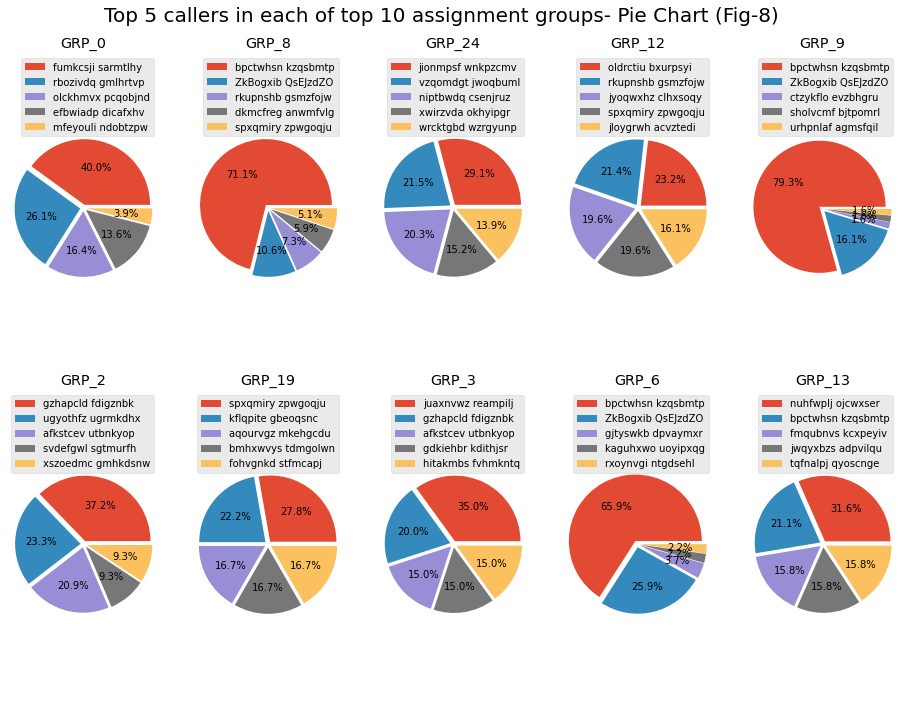

In [ ]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
top_grps = assgn_grp.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [ ]:
# Check if any caller appears to raise ticket for multiple groups
mul_caller = caller_grp[caller_grp.Caller.duplicated()]
uni_mul_caller = [idx[1] for idx in mul_caller.index[mul_caller.Caller.unique()]]
print(f'\033[1mFollowing {len(uni_mul_caller)} callers happen to raise tickets for multiple groups:\033[0m\n')
print(uni_mul_caller)

mul_caller

Following 15 callers happen to raise tickets for multiple groups:

['hlrmufzx qcdzierm', 'fbgetczn jlsvxura', 'gnasmtvx cwxtsvkm', 'ihfkwzjd erbxoyqk', 'tqfnalpj qyoscnge', 'fmqubnvs kcxpeyiv', 'tghrloks jbgcvlmf', 'jwqyxbzs adpvilqu', 'nuhfwplj ojcwxser', 'oldrctiu bxurpsyi', 'vlymsnej whlqxcst', 'dkmcfreg anwmfvlg', 'bpctwhsn kzqsbmtp', 'spxqmiry zpwgoqju', 'obanjrhg rnafleys']


Caller
Assignment group Caller                   
GRP_1            spxqmiry zpwgoqju       3
GRP_10           ihfkwzjd erbxoyqk       6
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3
GRP_11           tghrloks jbgcvlmf       2
...                                    ...
GRP_73           kcnosyae zlpmfxgs       1
GRP_8            ZkBogxib QsEJzdZO      54
GRP_9            ctzykflo evzbhgru       3
                 sholvcmf bjtpomrl       3
                 urhpnlaf agmsfqil       3

[281 rows x 1 columns]

**Comments:**

* There are 2950 callers have been captured in the entire dataset.
* 15 callers are identified to be involved in raising tickets for multiple assignment groups, there by contributing total 281 tickets in the dataset.
* The analysis of top 5 callers volume in each of the top 10 assignment groups shows a wide veriety of distributions in each pie chart. This is an indicative of the fact that each assignment group deals with issues impacting the business in NOT biased propertions.

**The distribution of Short description lengths**

In [ ]:
# Serialize the preprocessed dataset
df.to_csv('preprocessed_ticket.csv', index=False, encoding='utf_8_sig')
with open('preprocessed_ticket.pkl','wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Short Desc text length
df['sd_len'].iplot(
    kind='scatter',
    xTitle='text length',
    yTitle='count',
    title='Short Desc. Text Length Distribution (Fig-9)')



In [ ]:
# Short desc word count
df['sd_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='pastel1',
    title='Short desc. Word Count Distribution (Fig-10)')

**The distribution of Description lengths**

In [ ]:
# Description text length
df['desc_len'].iplot(
    kind='bar',
    xTitle='text length',
    yTitle='count',
    colorscale='-ylgn',
    title='Description Text Length Distribution (Fig-11)')

In [ ]:
# Description word count
df['desc_word_count'].iplot(
    kind='bar',
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='-bupu',
    title='Description Word Count Distribution (Fig-12)')

In [ ]:
# Merge the Short descrition and Description column texts to create a new column
df.insert(loc=8, 
              column='Summary', 
              allow_duplicates=True, 
              value=list(df['Short description'].str.strip() + ' ' + df['Description'].str.strip()))
# Extend the English Stop Wordss
STOP_WORDS = STOPWORDS.union({'yes','na','hi',
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

# Generic function to derive top N n-grams from the corpus
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [ ]:
# Top 50 Unigrams before removing stop words
top_n = 50
ngram_range = (1,1)
uni_grams = get_top_n_ngrams(df.Summary, top_n, ngram_range)

df1 = pd.DataFrame(uni_grams, columns = ['Summary' , 'count'])
df1.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Unigrams in Summary')

# Top 50 Unigrams after removing stop words
uni_grams_sw = get_top_n_ngrams(df.Summary, top_n, ngram_range, stopwords=STOP_WORDS)

df1 = pd.DataFrame(uni_grams_sw, columns = ['Summary' , 'count'])
df1.groupby('Summary').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Unigrams in Summary without stop words')

In [ ]:
def generate_word_clod(corpus):
    # mask = np.array(Image.open('cloud2.png'))
    # Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords=STOP_WORDS,
                    # mask=mask,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

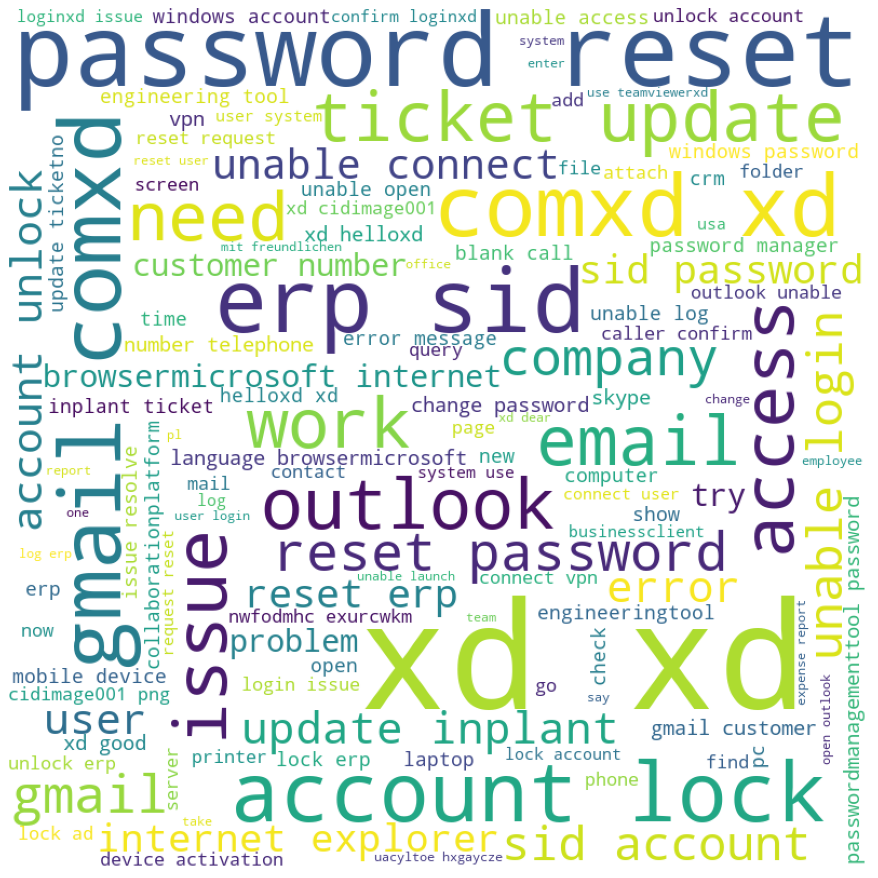

In [ ]:
# Word Cloud for all tickets assigned to GRP_0
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_0'].Summary.str.strip()))

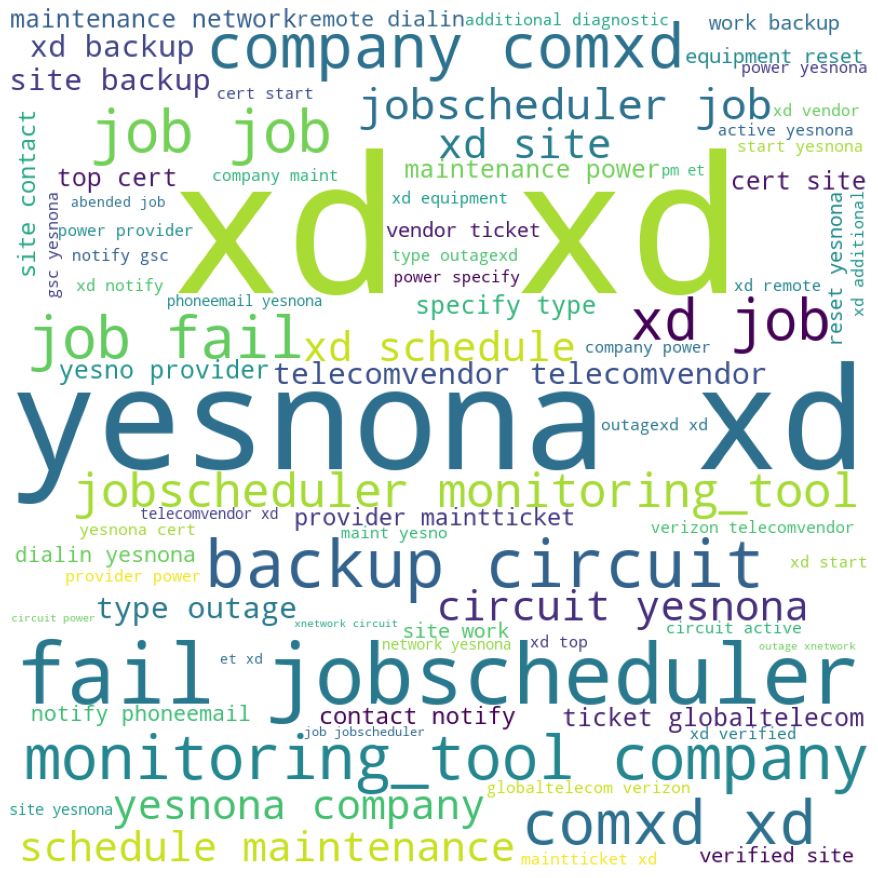

In [ ]:
# Word Cloud for all tickets assigned to GRP_8
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_8'].Summary.str.strip()))

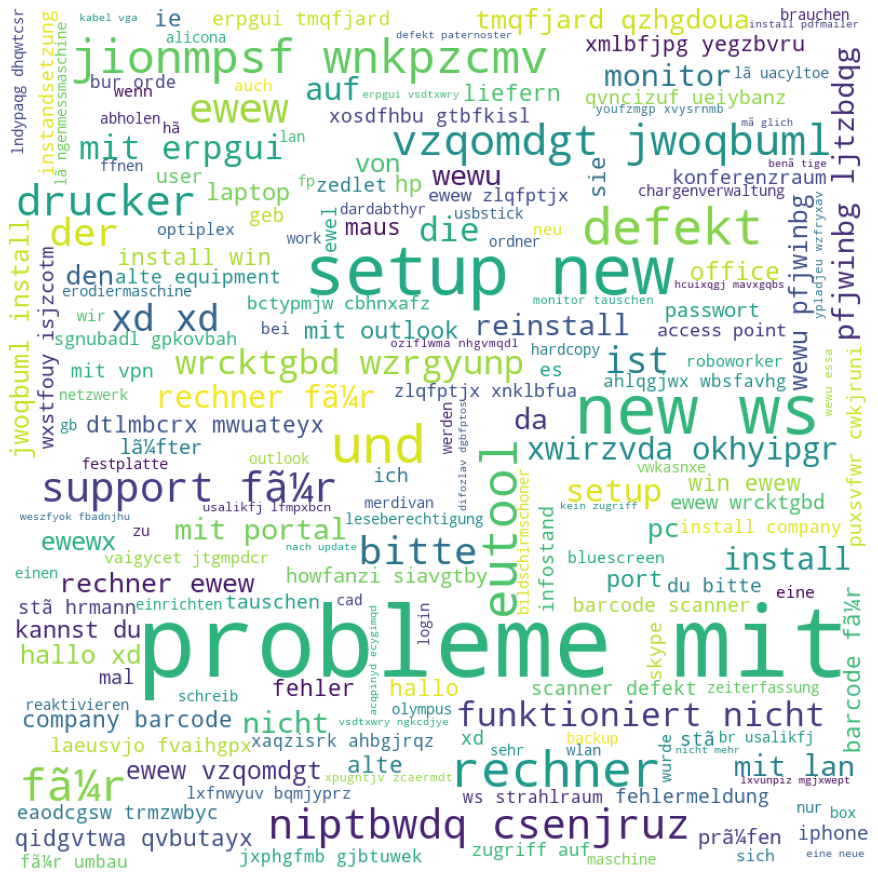

In [ ]:
# Word Cloud for all tickets assigned to GRP_24
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_24'].Summary.str.strip()))

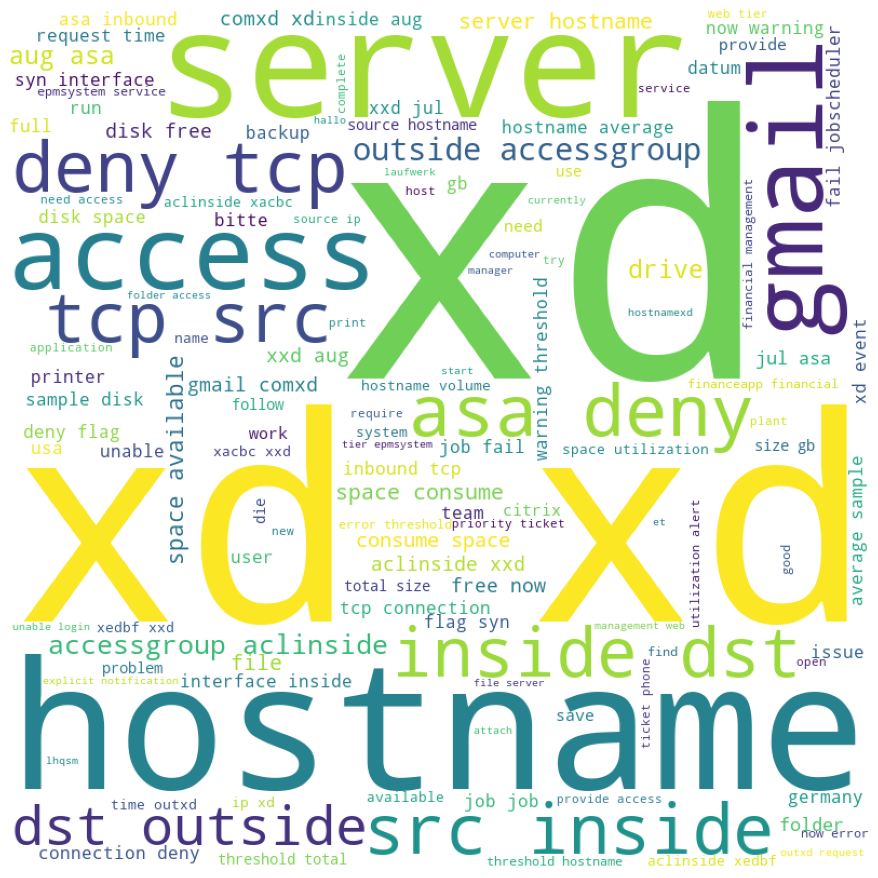

In [ ]:
# Word Cloud for all tickets assigned to GRP_12	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_12'].Summary.str.strip()))

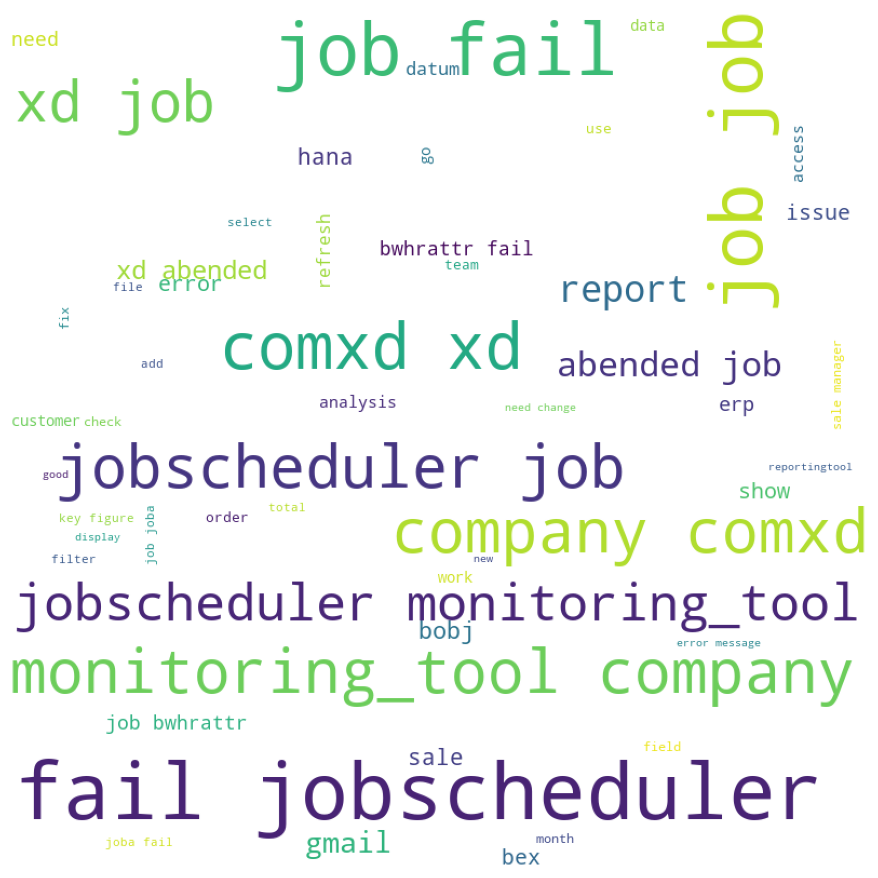

In [ ]:
# Word Cloud for all tickets assigned to GRP_9	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_9'].Summary.str.strip()))

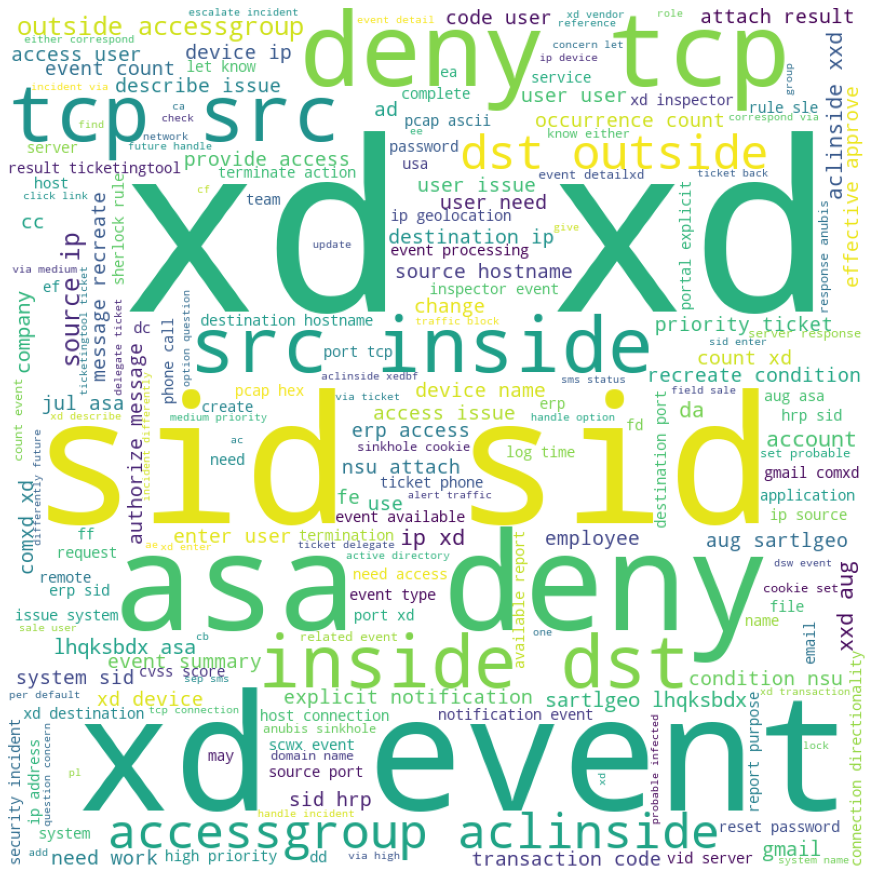

In [ ]:
# Word Cloud for all tickets assigned to GRP_2	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_2'].Summary.str.strip()))

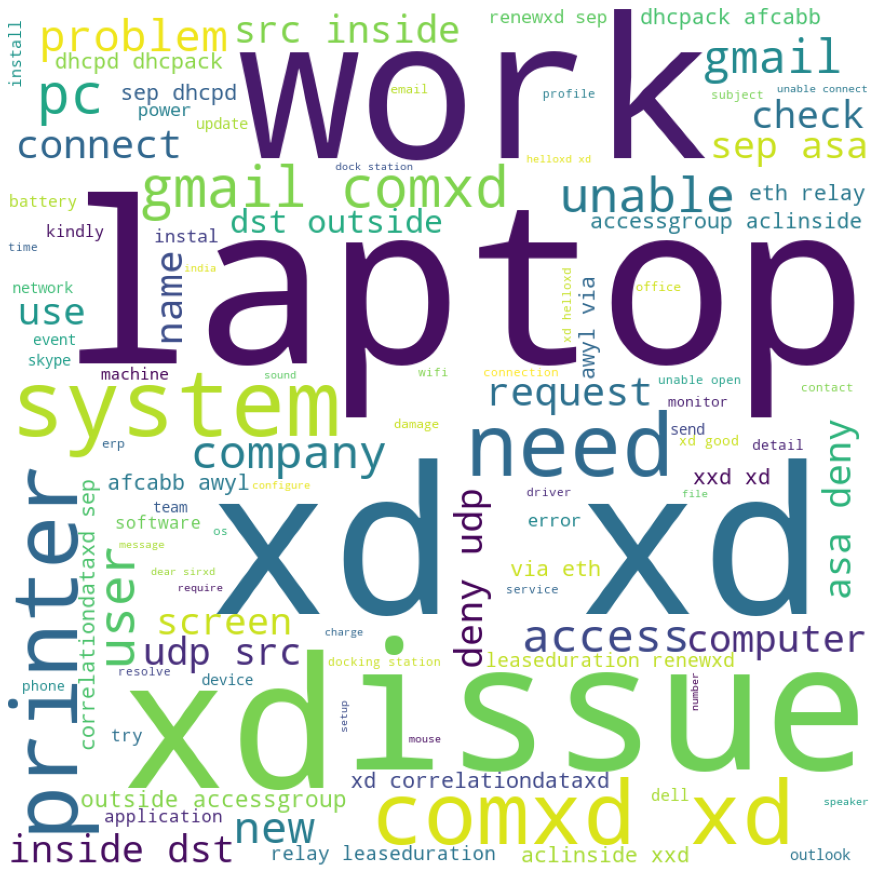

In [ ]:
# Word Cloud for all tickets assigned to GRP_19	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_19'].Summary.str.strip()))

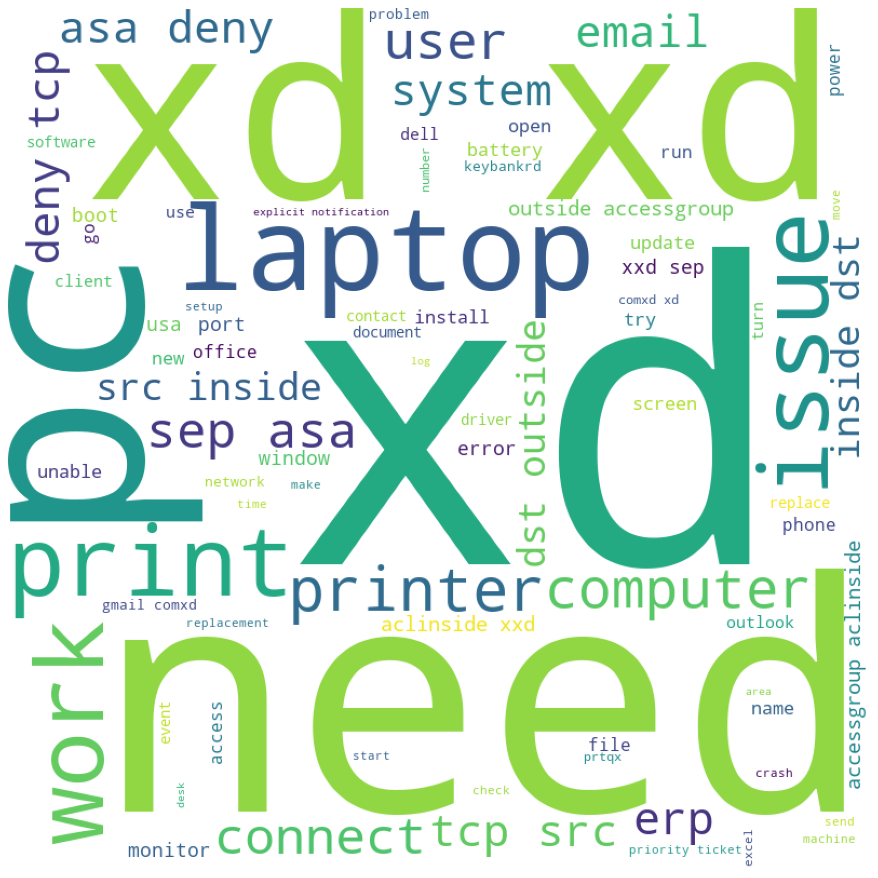

In [ ]:
# Word Cloud for all tickets assigned to GRP_3	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_3'].Summary.str.strip()))

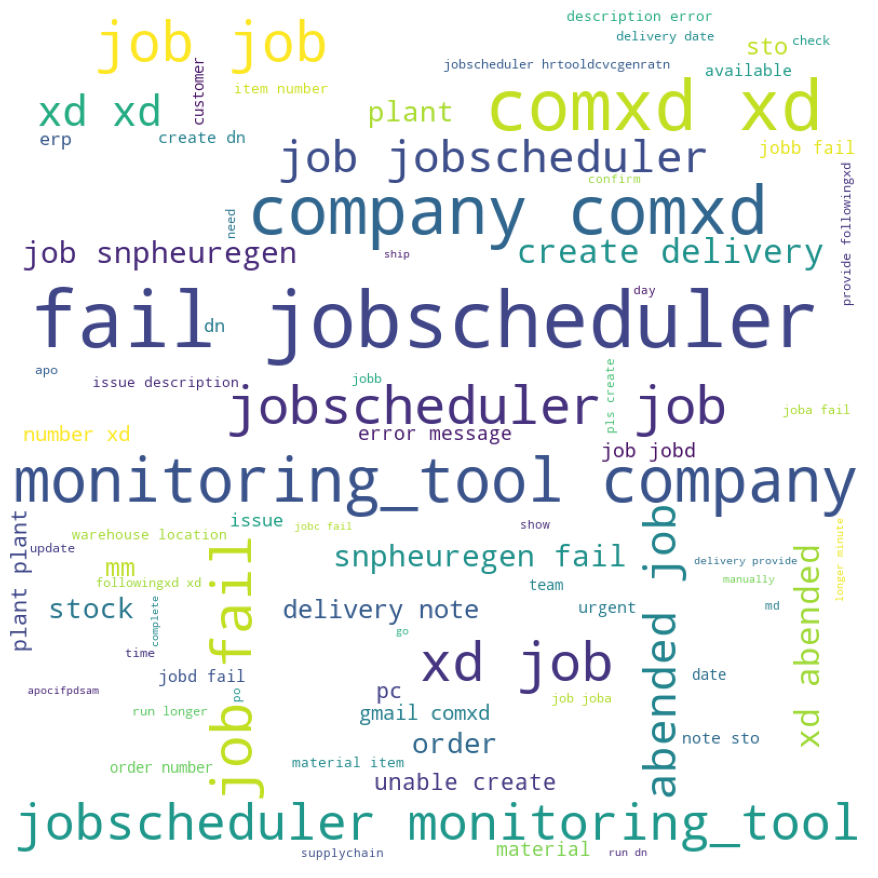

In [ ]:
# Word Cloud for all tickets assigned to GRP_6	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_6'].Summary.str.strip()))

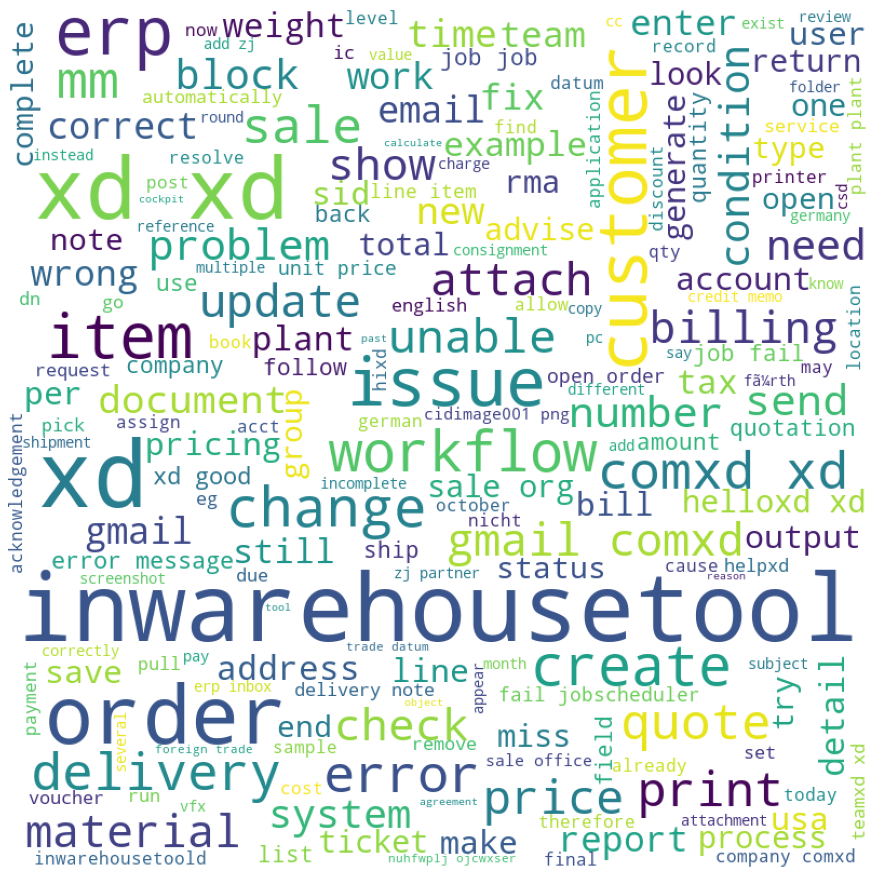

In [ ]:
# Word Cloud for all tickets assigned to GRP_13	
generate_word_clod(' '.join(df[df['Assignment group'] == 'GRP_13'].Summary.str.strip()))

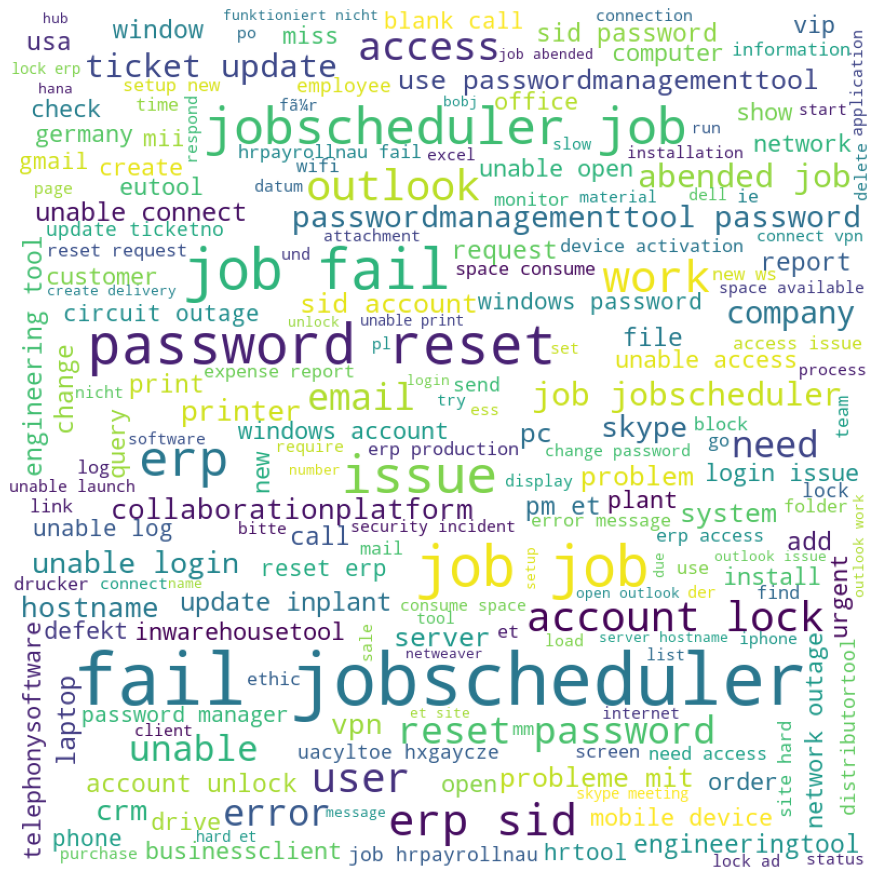

In [ ]:
# Generate wordcloud for ticket Short description
generate_word_clod(' '.join(df['Short description'].str.strip()))

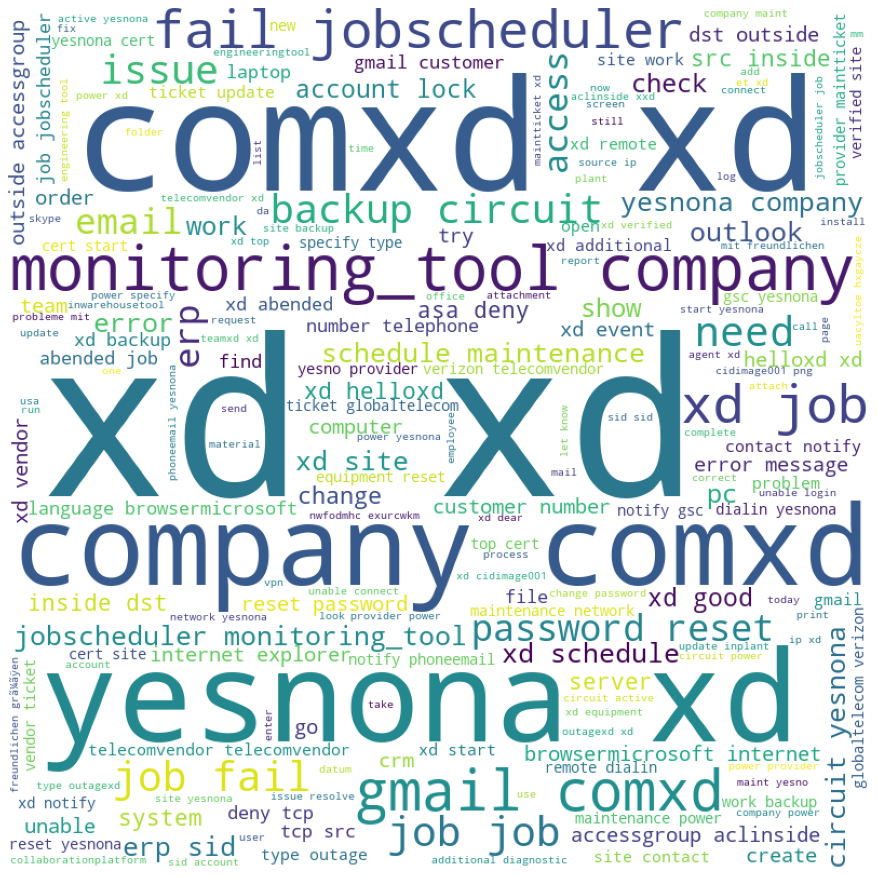

In [ ]:
# Generate wordcloud for ticket Description
generate_word_clod(' '.join(df.Description.str.strip()))

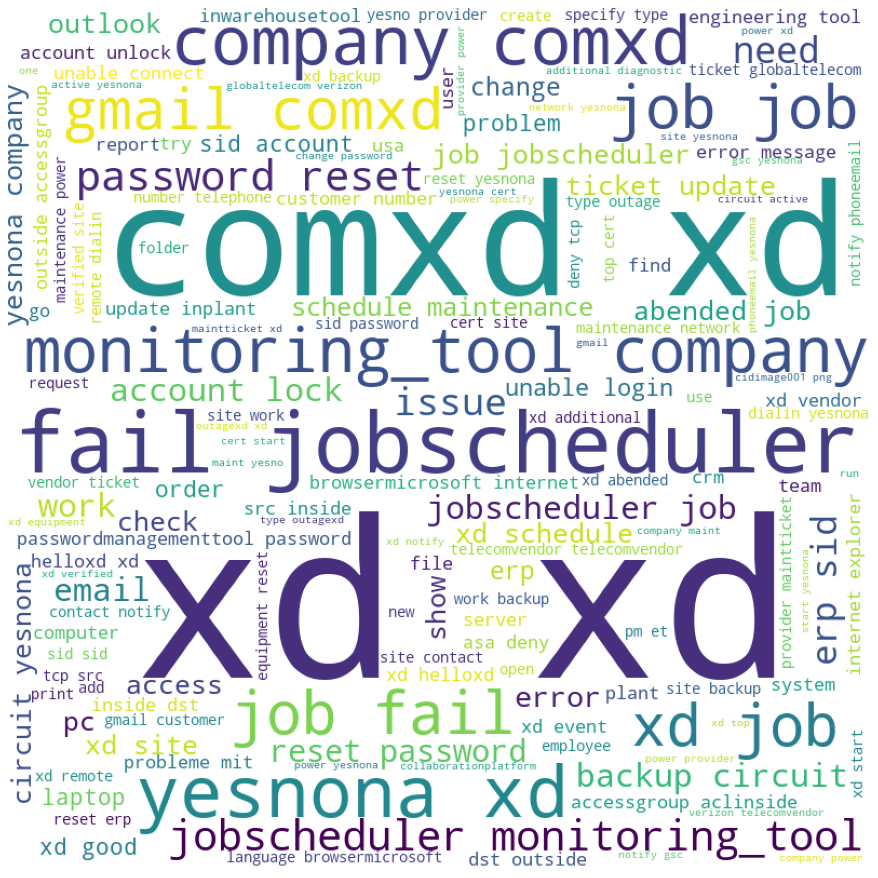

In [ ]:
# Generate wordcloud for ticket Summary
generate_word_clod(' '.join(df.Summary.str.strip()))

In [ ]:
# Serialize the dataset after EDA
with open('model_ready.pkl','wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

**Comments**:

* It's indicative from the n-gram analysis and the word cloud is that the entire dataset speaks more about issues around
* password reset (1246 times)
* fail job_scheduler (1614 times)
* outlook (948 times)
* login (861 times)
* job fail (897 times)

* Analysis on GRP_0 which is the most frequent group to assign a ticket to reveals that this group deals with mostly the maintenance problems such as password reset, account lock, login issue, ticket update etc.
* Maximum of the tickets from GRP_0 can be reduced by self correcting itself by putting automation scripts/mechanisms to help resolve these common maintenance issues. This will help in lowering the inflow of service tickets thereby saving the person/hour efforts spend and increasing the business revenue.

**Model Building**

Let's proceed towards trying different model architectures mentioned below to classify the problem and validate which one is outperforming.

* Multinomial Naive Bayes
* K Nearest neighbor
* Support Vector Machine
* Decission Tree
* Random Forest
* Deep Neural Network
* Convolutional Neural Network
* Recurrent Neural Network
* Recurrent Convolutional Neural Network
* RNN with LSTM

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [ ]:
# Create a target categorical column
df['target'] = df['Assignment group'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   sd_len             8500 non-null   int64 
 2   sd_word_count      8500 non-null   int64 
 3   Description        8500 non-null   object
 4   desc_len           8500 non-null   int64 
 5   desc_word_count    8500 non-null   int64 
 6   Caller             8500 non-null   object
 7   Assignment group   8500 non-null   object
 8   Summary            8500 non-null   object
 9   target             8500 non-null   int8  
dtypes: int64(4), int8(1), object(5)
memory usage: 606.1+ KB


In [ ]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df.Summary, 
                                                    df.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


**Naive Bayes Classifier**

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.

**Advantages**:

* It works very well with text data
* Easy to implement
* Fast in comparing to other algorithms

Disadvantages:

* A strong assumption about the shape of the data distribution
* Limited by data scarcity for which any possible value in feature space, a likelihood value must be estimated by a frequentist

In [ ]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 56.93%
Testing accuracy: 53.24%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  3   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [ 15   0   0 ...   0 106   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.64      0.21      0.32        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

In [ ]:
pickle.dump(MultinomialNB(), open('MNBmodel.pkl','wb'))

**K-nearest Neighbor**



In [ ]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 70.19%
Testing accuracy: 62.82%
Confusion matrix:
 [[742   0   0 ...   0   0   0]
 [  2   0   0 ...   0   2   0]
 [ 10   0   9 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0  97   8]
 [ 15   0   0 ...   0  28  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       761
           1       0.00      0.00      0.00         8
           2       0.75      0.38      0.50        24
           3       1.00      0.40      0.57         5
           4       0.48      0.36      0.41        42
           5       0.44      0.27      0.33        26
           6       0.50      0.25      0.33        20
           7       0.00      0.00      0.00         8
           8       0.50      0.05      0.09        20
           9       1.00      0.59   

In [ ]:
pickle.dump(KNeighborsClassifier(), open('KNNmodel.pkl','wb'))

**Support Vector Machine (SVM)**



In [ ]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 93.40%
Testing accuracy: 68.35%
Confusion matrix:
 [[711   0   0 ...   0   0   1]
 [  0   0   0 ...   0   1   0]
 [  4   0  14 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  0   1   2 ...   0 107   1]
 [  7   0   0 ...   0  35  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       761
           1       0.00      0.00      0.00         8
           2       0.64      0.58      0.61        24
           3       0.67      0.40      0.50         5
           4       0.49      0.60      0.54        42
           5       0.56      0.54      0.55        26
           6       0.45      0.45      0.45        20
           7       0.50      0.12      0.20         8
           8       0.27      0.15      0.19        20
           9       0.88      0.88      0.88    

In [ ]:
pickle.dump(LinearSVC(), open('LinearSVCmodel.pkl','wb'))

In [ ]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 82.47%
Testing accuracy: 62.29%
Confusion matrix:
 [[753   0   0 ...   0   0   0]
 [  2   0   0 ...   0   1   0]
 [ 14   0   9 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0 107   1]
 [ 16   0   0 ...   0  35   3]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       761
           1       0.00      0.00      0.00         8
           2       0.82      0.38      0.51        24
           3       0.00      0.00      0.00         5
           4       0.50      0.43      0.46        42
           5       0.55      0.23      0.32        26
           6       1.00      0.25      0.40        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.88      0.94        17

In [ ]:
pickle.dump(SVC(kernel='rbf'), open('SVCrbfmodel.pkl','wb'))

**Decision Tree**

In [ ]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 95.60%
Testing accuracy: 56.35%
Confusion matrix:
 [[627   1   2 ...   0   1   3]
 [  0   0   0 ...   0   1   0]
 [  9   0  11 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   1   2 ...   0  89   7]
 [  9   0   0 ...   0  28   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       761
           1       0.00      0.00      0.00         8
           2       0.48      0.46      0.47        24
           3       0.25      0.20      0.22         5
           4       0.30      0.33      0.32        42
           5       0.21      0.19      0.20        26
           6       0.33      0.25      0.29        20
           7       0.20      0.12      0.15         8
           8       0.19      0.15      0.17        20
           9       0.89      1.00 

In [ ]:
pickle.dump(DecisionTreeClassifier(), open('DecisionTreemodel.pkl','wb'))

**Random Forest**

In [ ]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 95.60%
Testing accuracy: 62.41%
Confusion matrix:
 [[755   0   0 ...   0   0   0]
 [  2   0   0 ...   0   1   0]
 [ 15   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   1   2 ...   0  98   8]
 [ 16   0   0 ...   0  28  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       761
           1       0.00      0.00      0.00         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.61      0.40      0.49        42
           5       0.40      0.08      0.13        26
           6       0.75      0.15      0.25        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.88 

In [ ]:
pickle.dump(RandomForestClassifier(n_estimators=100), open('RandomForestmodel.pkl','wb'))

**Observations**:

* All of the following Statistical Machine learning algorithms we tried, are heavily overfitted. The training accuracy for all of them is coming to be more than 90%
* And the test accuracies are as follows:
* Multinomial Naive Bayes- 53.24%
* K Nearest Neighbor- 62.82%
* Linear SVM- 68.35%
* SVC with RBF kernel- 62.29%
* Decission Tree- 56.65%
* Random Forest- 62.18%

We'll be fine tuning the models and reduce the overfitting in next iteration.

**Neural Network**

In [ ]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

**Deep Neural Networks**

In [ ]:
# Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df.Summary)
X_train_tfidf = Tfidf_vect.transform(X_train).toarray()
X_test_tfidf = Tfidf_vect.transform(X_test).toarray()

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 75)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560512   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                        

In [ ]:
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)

Epoch 1/10

Epoch 1: val_loss improved from inf to 2.98736, saving model to Weights/NN_epoch01_loss2.9874.h5
54/54 - 5s - loss: 3.0248 - accuracy: 0.3904 - val_loss: 2.9874 - val_accuracy: 0.4476 - 5s/epoch - 90ms/step
Epoch 2/10

Epoch 2: val_loss improved from 2.98736 to 2.77127, saving model to Weights/NN_epoch02_loss2.7713.h5
54/54 - 1s - loss: 1.8502 - accuracy: 0.5832 - val_loss: 2.7713 - val_accuracy: 0.4476 - 554ms/epoch - 10ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 2.77127
54/54 - 0s - loss: 1.5298 - accuracy: 0.6285 - val_loss: 2.7997 - val_accuracy: 0.4476 - 399ms/epoch - 7ms/step
Epoch 4/10

Epoch 4: val_loss improved from 2.77127 to 2.76191, saving model to Weights/NN_epoch04_loss2.7619.h5
54/54 - 1s - loss: 1.2527 - accuracy: 0.6809 - val_loss: 2.7619 - val_accuracy: 0.4476 - 544ms/epoch - 10ms/step
Epoch 5/10

Epoch 5: val_loss improved from 2.76191 to 2.72568, saving model to Weights/NN_epoch05_loss2.7257.h5
54/54 - 1s - loss: 1.0103 - accuracy: 0.7363 

In [ ]:
pickle.dump(model_DNN, open('DNNmodel.pkl','wb'))

INFO:tensorflow:Assets written to: ram://4adea98c-5dea-4b17-92eb-bb8325ea7d8d/assets


**Extract Glove Embeddings**

In [ ]:
gloveFileName = '/content/drive/MyDrive/Final_Shripad/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 18630 unique tokens.
(8500, 500)
Total 400000 word vectors.


In [ ]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

Filter   5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 200)     3726200     ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 499, 128)     51328       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 498, 128)     76928       ['embedding[0][0]']              
                                                                                   

In [ ]:
pickle.dump(model_CNN, open('CNNmodel.pkl','wb'))

INFO:tensorflow:Assets written to: ram://7bdc1806-e874-49f3-abe6-e23af5695ac3/assets


**Recurrent Neural Networks (RNN)**

In [ ]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

32
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 200)          3726200   
                                                                 
 gru (GRU)                   (None, 500, 32)           22464     
                                                                 
 dropout_9 (Dropout)         (None, 500, 32)           0         
                                                                 
 batch_normalization_6 (Batc  (None, 500, 32)          128       
 hNormalization)                                                 
                                                                 
 gru_1 (GRU)                 (None, 500, 32)           6336      
                                                                 
 dropout_10 (Dropout)        (None, 500, 32)           0         
                                                   

In [ ]:
pickle.dump(model_RNN, open('RNNmodel.pkl','wb'))

INFO:tensorflow:Assets written to: ram://fe2656c2-7b16-4434-8d5d-5fbec09c838a/assets


**Recurring Convolution Neural Network(RCNN)**

In [ ]:
def Build_Model_RCNN_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_RCNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RCNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RCNN')

Filter   5
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 500, 200)     3726200     ['input_2[0][0]']                
                                                                                                  
 conv1d_7 (Conv1D)              (None, 499, 128)     51328       ['embedding_2[0][0]']            
                                                                                                  
 conv1d_8 (Conv1D)              (None, 498, 128)     76928       ['embedding_2[0][0]']            
                                                                                 

Epoch 1/10
53/54 [============================>.] - ETA: 0s - loss: 3.1633 - accuracy: 0.4307
Epoch 1: val_loss improved from inf to 3.06498, saving model to Weights/RCNN_epoch01_loss3.0650.h5
54/54 [==============================] - 7s 111ms/step - loss: 3.1627 - accuracy: 0.4306 - val_loss: 3.0650 - val_accuracy: 0.4476
Epoch 2/10
53/54 [============================>.] - ETA: 0s - loss: 2.5887 - accuracy: 0.4736
Epoch 2: val_loss did not improve from 3.06498
54/54 [==============================] - 6s 109ms/step - loss: 2.5912 - accuracy: 0.4732 - val_loss: 3.7624 - val_accuracy: 0.4476
Epoch 3/10
53/54 [============================>.] - ETA: 0s - loss: 2.5213 - accuracy: 0.4730
Epoch 3: val_loss did not improve from 3.06498
54/54 [==============================] - 6s 104ms/step - loss: 2.5205 - accuracy: 0.4731 - val_loss: 3.5724 - val_accuracy: 0.4471
Epoch 4/10
53/54 [============================>.] - ETA: 0s - loss: 2.3584 - accuracy: 0.4956
Epoch 4: val_loss did not improve from

In [ ]:
pickle.dump(model_RCNN, open('RCNNmodel.pkl','wb'))

INFO:tensorflow:Assets written to: ram://12c05a3e-65e0-4686-bb5c-e518699713aa/assets


INFO:tensorflow:Assets written to: ram://12c05a3e-65e0-4686-bb5c-e518699713aa/assets


**RNN with LSTM networks**

In [ ]:
EMBEDDING_DIM = 100
gloveFileName = '/content/drive/MyDrive/Final_Shripad/glove.6B.100d.txt'

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 75)
run_classification(model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')

Found 18630 unique tokens.
(8500, 500)
Total 400000 word vectors.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 100)          1863100   
                                                                 
 dropout_17 (Dropout)        (None, 500, 100)          0         
                                                                 
 conv1d_14 (Conv1D)          (None, 499, 256)          51456     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 249, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 248, 256)          131328    
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 124, 256)         0         
 g1D)                                                 

Epoch 1/10
54/54 [==============================] - ETA: 0s - loss: 2.6655 - accuracy: 0.4619
Epoch 1: val_loss improved from inf to 2.63906, saving model to Weights/LSTM_epoch01_loss2.6391.h5
54/54 [==============================] - 73s 1s/step - loss: 2.6655 - accuracy: 0.4619 - val_loss: 2.6391 - val_accuracy: 0.4476
Epoch 2/10
54/54 [==============================] - ETA: 0s - loss: 2.5471 - accuracy: 0.4728
Epoch 2: val_loss improved from 2.63906 to 2.61893, saving model to Weights/LSTM_epoch02_loss2.6189.h5
54/54 [==============================] - 60s 1s/step - loss: 2.5471 - accuracy: 0.4728 - val_loss: 2.6189 - val_accuracy: 0.4476
Epoch 3/10
54/54 [==============================] - ETA: 0s - loss: 2.4863 - accuracy: 0.4728
Epoch 3: val_loss improved from 2.61893 to 2.49154, saving model to Weights/LSTM_epoch03_loss2.4915.h5
54/54 [==============================] - 49s 898ms/step - loss: 2.4863 - accuracy: 0.4728 - val_loss: 2.4915 - val_accuracy: 0.4476
Epoch 4/10
54/54 [=====

In [ ]:
pickle.dump(model_LTSM, open('LTSMmodel.pkl','wb'))

INFO:tensorflow:Assets written to: ram://9239cba5-c4e9-48f1-918b-083fa0c0ced7/assets


INFO:tensorflow:Assets written to: ram://9239cba5-c4e9-48f1-918b-083fa0c0ced7/assets
